# COMP 562 Final Project

**Topic**: Disaster Tweets

**Dataset**: NLP Disaster Tweets (from Kaggle)

**Description**: Given a tweet, decide whether or not it is talking about an actual distaster. Possible use cases for this are for news agencies who want to keep up on developments by using Twitter as a data source. 

**Group**: Tasnia Sarwar, Tylar Watson, Kipp Williams, Brennora Cameron

## Part 1: Pre-Processing the Given Data
* Reading in data
* Cleaning data
* Vectorizing data 

### Part 1.1: Reading in Data

**OUTPUT**: 

train: 
* pandas dataframe of the train.csv dataset.
* $N$ x $5$ matrix where $N=7613 =$ number of tweets, and the $5$ columns are 
  * id: unique number identifying the tweet
  * text: the content of the tweet
  * keyword: any identified keywords in the tweet
  * location: the location of the tweet's author
  * target: 1 for disaster, 0 for not disaster


test: 
* pandas dataframe of the test.csv dataset
* $N$ x $4$ matrix where $N=3263 =$ number of tweets, and the $4$ columns are 
  * id: unique number identifying the tweet
  * text: the content of the tweet
  * keyword: any identified keywords in the tweet
  * location: the location of the tweet's author




In [0]:
# Import dependencies for this part
import numpy as np
import pandas as pd
import re
from string import punctuation 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
# Read in csv files: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
train_raw_url = 'https://raw.githubusercontent.com/tasnias/COMP-562/master/train.csv'
test_raw_url = 'https://raw.githubusercontent.com/tasnias/COMP-562/master/test.csv'

train = pd.read_csv(train_raw_url, dtype={'id': np.int16, 'target': np.int8}) 
test = pd.read_csv(test_raw_url, dtype={'id': np.int16})
print('Done reading in train dataset and test dataset')

Done reading in train dataset and test dataset


### Part 1.2: Cleaning Data
* Make text all lowercase
* Trim whitespace
* Clean urls
* Remove newlines
* "Uncontract" contractions
* Remove non-standard characters (hashtags, punctuation, etc.)
* Remove numbers


In [0]:
def remove_contractions(tweet):
    tweet = re.sub(r"won\'t", "will not", tweet)
    tweet = re.sub(r"can\'t", "can not", tweet)
    tweet = re.sub(r"n\'t", " not", tweet)
    tweet = re.sub(r"\'re", " are", tweet)
    tweet = re.sub(r"\'s", " is", tweet)
    tweet = re.sub(r"\'d", " would", tweet)
    tweet = re.sub(r"\'ll", " will", tweet)
    tweet = re.sub(r"\'t", " not", tweet)
    tweet = re.sub(r"\'ve", " have", tweet)
    tweet = re.sub(r"\'m", " am", tweet)
    return tweet

def clean_tweet(tweet):
  tweet = tweet.lower() # make lowercase
  tweet = tweet.strip() # remove surrounding whitespace 
  text = re.sub('https?://\S+|www\.\S+', '', tweet) # clean urls
  tweet = re.sub('\n', '', tweet) # remove new line
  tweet = remove_contractions(tweet) # undo contractions
  tweet = re.sub('[%s]' % re.escape(punctuation), '', tweet) # remove punctuation
  tweet = re.sub('\w*\d\w*', '', tweet) # remove words with numbers in them
  return tweet

In [0]:
# clean the data
train['text'] = train['text'].apply(lambda tweet: clean_tweet(tweet))
test['text'] = test['text'].apply(lambda tweet: clean_tweet(tweet))

print('Done cleaning train and test set')

print('\nExample training tweets:')
print(train['text'][0:5])
print('\nExample testing tweets:')
print(test['text'][0:5])

Done cleaning train and test set

Example training tweets:
0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to  ishelter in place are ...
3     people receive wildfires evacuation orders in...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

Example testing tweets:
0                   just happened a terrible car crash
1    heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                apocalypse lighting spokane wildfires
4          typhoon soudelor kills  in china and taiwan
Name: text, dtype: object


### Part 1.3: Vectorizing
* Tokenize and vectorize the tweets into numerical features that can be used in machine learning models
* There are different options for vectorization, including count vectorization and TF-IDF vectorization
* **Count Vectorization**: Pretty much bag of words. 
* **TF-IDF Vectorization**: Term Frequency - Inverse Document Frequency
  * Given a word $i$ in a tweet $j$, TF-IDF assigns the word a numerical feature value as
$$x_{i,j} = \frac{\text{occurrences of } i \text{ in } j}{\text{number of words in } j} * [1 + \log{\frac{\text{number of tweets}}{\text{number of tweets where } i \text{ occurs}}}]$$

**OUTPUT**: 

train_features_cv
* input matrix where features are phrases inside each tweet. Features are vectorized using CountVectorizer
* $N$ x $p$ matrix, where $N = 7613 = $ number of tweets in set and $p = 62886 = $ number of features per tweet

test_features_cv
* input matrix where features are phrases inside each tweet. Features are vectorized using CountVectorizer
* $N$ x $p$ matrix, where $N = 3263 = $ number of tweets in set and $p = 62886 = $ number of features per tweet

train_features_tfidf
* input matrix where features are phrases inside each tweet. Features are vectorized using TfidfVectorizer
* $N$ x $p$ matrix, where $N = 7613 = $ number of tweets in set and $p = 62886 = $ number of features per tweet

test_features_tfidf
* input matrix where features are phrases inside each tweet. Features are vectorized using TfidfVectorizer
* $N$ x $p$ matrix, where $N = 3263 = $ number of tweets in set and $p = 62886 = $ number of features per tweet

In [0]:
# Count Vectorizer
# stopwords removed; use monograms and bigrams
count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2))
train_features_cv = count_vectorizer.fit_transform(train['text'])
test_features_cv = count_vectorizer.transform(test["text"])
print('Done making phrases into features using Count Vectorizer for train and test sets')

Done making phrases into features using Count Vectorizer for train and test sets


In [0]:
# TF-IDF Vectorizer
# l2 normalization is used by default; stopwords removed; use monograms and bigrams
tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), ngram_range=(1, 2))
train_features_tfidf = tfidf_vectorizer.fit_transform(train['text'])
test_features_tfidf = tfidf_vectorizer.transform(test["text"])
print('Done making phrases into features using TF-IDF Vectorizer for train and test sets')

Done making phrases into features using TF-IDF Vectorizer for train and test sets


## Part 2: Implement Possible Models
* Logistic Regression 
* SVM

### Part 2.1: Logistic Regression

----- Logistic Regression Model -----
              precision    recall  f1-score   support

           0       0.74      0.95      0.84      1330
           1       0.90      0.54      0.67       954

    accuracy                           0.78      2284
   macro avg       0.82      0.75      0.75      2284
weighted avg       0.81      0.78      0.77      2284

Logistic: ROC AUC=0.854


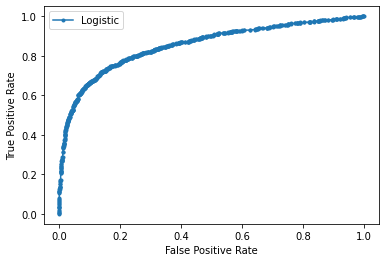

[[1270   60]
 [ 439  515]]
['True Negative', 'False Positive']
['False Negative', 'True Positive']


Text(0.5, 15.0, 'Predicted label')

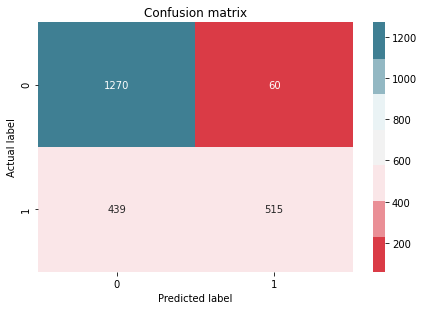

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import seaborn as sea


#accreditation for help: Surya Remanan, medium article writer & packtpub tensorflow documentation

# split data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(train_features_tfidf, 
                                                    train['target'], test_size=0.30, 
                                                    random_state=101)


# use the logistic regression model & fit to data
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
#make predictions
prediction = lr_model.predict(x_test)
#get roc/auc curve & score:
lr_probs = lr_model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
#print classification report
print("----- Logistic Regression Model -----")
print(classification_report(y_test,prediction))
#print auc score
print('Logistic: ROC AUC=%.3f' % (lr_auc)) 
#print roc curve
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#confusion matrix
c_matrix = metrics.confusion_matrix(y_test, prediction)
c_matrix_labels1 = ["True Negative", "False Positive"]
c_matrix_labels2 = ["False Negative","True Positive"]

print(c_matrix)
print(c_matrix_labels1)
print(c_matrix_labels2)
#confusion matrix heatmap
class_names=[0,1] # name  of classes
fig, ax = pyplot.subplots()
tick_marks = np.arange(len(class_names))
pyplot.xticks(tick_marks, class_names)
pyplot.yticks(tick_marks, class_names)
# create heatmap
cmap = sea.diverging_palette(10, 220, sep=80, n=7)
sea.heatmap(pd.DataFrame(c_matrix), annot=True, cmap=cmap ,fmt='g')
pyplot.tight_layout()
pyplot.title('Confusion matrix', y=1.1)
pyplot.ylabel('Actual label')
pyplot.xlabel('Predicted label')

### Part 2.2: SVM

In [0]:

# Import train_test_split function
from sklearn.model_selection import train_test_split
# Import metrics
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(train_features_tfidf, train['target'], test_size=0.3,random_state=101) # 70% training and 30% test


#Import svm model
from sklearn import svm 

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()


# Tuning hyper-parameters for precision



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}

Grid scores on development set:

0.283 (+/-0.000) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.283 (+/-0.000) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.283 (+/-0.000) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.283 (+/-0.000) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.802 (+/-0.012) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.283 (+/-0.000) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.800 (+/-0.030) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.802 (+/-0.012) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.811 (+/-0.023) for {'C': 1, 'kernel': 'linear'}
0.793 (+/-0.025) for {'C': 10, 'kernel': 'linear'}
0.793 (+/-0.029) for {'C': 100, 'kernel': 'linear'}
0.779 (+/-0.093) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    

Linear SVM
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1330
           1       0.85      0.63      0.73       954

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.78      2284
weighted avg       0.81      0.80      0.79      2284

[[1224  106]
 [ 351  603]]
['True Positive', 'False Positive']
['False Negative', 'True Negative']
Gaussian SVM
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1330
           1       0.81      0.67      0.73       954

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.78      2284
weighted avg       0.80      0.80      0.79      2284

[[1182  148]
 [ 318  636]]
['True Positive', 'False Positive']
['False Negative', 'True Negative']


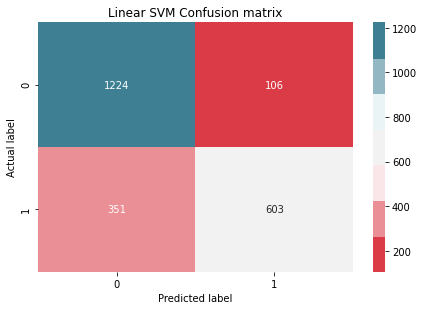

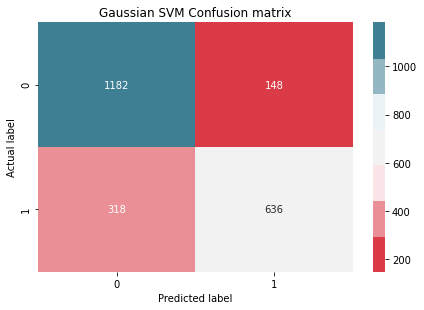

In [0]:
from sklearn import metrics
import matplotlib.pyplot as plt 
models = [
{
    'label': 'Linear SVM',
    'model': svm.SVC(kernel='linear', C=1, probability=True),
},
{
    'label': 'Gaussian SVM',
    'model': svm.SVC(kernel='rbf', gamma=.001, C=1000, probability=True),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
 #print classification report
    print(m['label'])
    print(classification_report(y_test,y_pred))
#confusion matrix
    c_matrix = metrics.confusion_matrix(y_test, y_pred)
    c_matrix_labels1 = ["True Positive", "False Positive"]
    c_matrix_labels2 = ["False Negative","True Negative"]

    print(c_matrix)
    print(c_matrix_labels1)
    print(c_matrix_labels2)
    #confusion matrix heatmap
    class_names=[0,1] # name  of classes
    fig, ax = pyplot.subplots()
    tick_marks = np.arange(len(class_names))
    pyplot.xticks(tick_marks, class_names)
    pyplot.yticks(tick_marks, class_names)
    # create heatmap
    cmap = sea.diverging_palette(10, 220, sep=80, n=7)
    sea.heatmap(pd.DataFrame(c_matrix), annot=True, cmap=cmap ,fmt='g')
    pyplot.tight_layout()
    pyplot.title(m['label']+' Confusion matrix', y=1.1)
    pyplot.ylabel('Actual label')
    pyplot.xlabel('Predicted label')

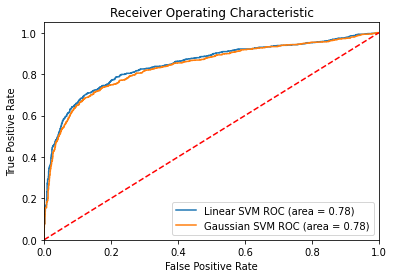

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Linear SVM',
    'model': svm.SVC(kernel='linear', C=1, probability=True),
},
{
    'label': 'Gaussian SVM',
    'model': svm.SVC(kernel='rbf', gamma=.001, C=1000, probability=True),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display
